# 🎯 Custom Loss Functions for CatBoost and TensorFlow

In this notebook, we demonstrate:
- How to implement and use a **custom loss function** in CatBoost and TensorFlow.
- The specific loss function we’ll use is **MAE Log10**, which computes the mean absolute error on the log10-transformed values of predictions and ground truths.

Custom loss functions are particularly useful for fine-tuning model behavior for domain-specific tasks.

## 1️⃣ Custom Loss Function in CatBoost

CatBoost allows defining custom loss functions for training.
We will:
1. Create a synthetic regression dataset.
2. Define the **MAE Log10** loss function.
3. Train a CatBoost model using this custom loss function.

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor, Pool

# Generate synthetic regression data
np.random.seed(42)
data = pd.DataFrame({
    'feature_1': np.random.rand(1000),
    'feature_2': np.random.rand(1000),
    'target': np.random.rand(1000) * 100  # Target values between 0 and 100
})

# Split data into train and test
train_data = data.iloc[:800]
test_data = data.iloc[800:]

train_pool = Pool(data=train_data[['feature_1', 'feature_2']], label=train_data['target'])
test_pool = Pool(data=test_data[['feature_1', 'feature_2']], label=test_data['target'])

# Define the custom loss function
def mae_log10_metric(y_true, y_pred):
    """
    Custom loss function: Mean Absolute Error on log10-transformed values
    """
    log_y_true = np.log10(y_true + 1)
    log_y_pred = np.log10(y_pred + 1)
    return np.mean(np.abs(log_y_true - log_y_pred))

# Define the custom loss class for CatBoost
class MAELog10Loss:
    def calc_ders_range(self, approxes, targets, weights):
        """
        Required method for CatBoost custom loss
        """
        return [(0.0, 0.0) for _ in range(len(approxes))]

    def evaluate(self, approxes, target, weight):
        """
        Evaluate the MAE Log10 loss
        """
        preds = approxes[0]
        loss = mae_log10_metric(target, preds)
        return loss, 0  # Loss value and standard deviation

# Train the model with adjusted subsample and bootstrap parameters
model = CatBoostRegressor(
    iterations=100,
    loss_function=MAELog10Loss(),
    eval_metric="MAPE",
    verbose=10,
    bootstrap_type="No"  # Disable bootstrap sampling
)
model.fit(train_pool, eval_set=test_pool)

0:	learn: 0.9938794	test: 0.9902620	best: 0.9902620 (0)	total: 169ms	remaining: 16.7s
10:	learn: 0.9938794	test: 0.9902620	best: 0.9902620 (0)	total: 175ms	remaining: 1.41s
20:	learn: 0.9938794	test: 0.9902620	best: 0.9902620 (0)	total: 180ms	remaining: 678ms
30:	learn: 0.9938794	test: 0.9902620	best: 0.9902620 (0)	total: 186ms	remaining: 413ms
40:	learn: 0.9938794	test: 0.9902620	best: 0.9902620 (0)	total: 191ms	remaining: 275ms
50:	learn: 0.9938794	test: 0.9902620	best: 0.9902620 (0)	total: 197ms	remaining: 189ms
60:	learn: 0.9938794	test: 0.9902620	best: 0.9902620 (0)	total: 203ms	remaining: 130ms
70:	learn: 0.9938794	test: 0.9902620	best: 0.9902620 (0)	total: 209ms	remaining: 85.6ms
80:	learn: 0.9938794	test: 0.9902620	best: 0.9902620 (0)	total: 215ms	remaining: 50.4ms
90:	learn: 0.9938794	test: 0.9902620	best: 0.9902620 (0)	total: 221ms	remaining: 21.8ms
99:	learn: 0.9938794	test: 0.9902620	best: 0.9902620 (0)	total: 225ms	remaining: 0us

bestTest = 0.990261963
bestIteration = 0



## 2️⃣ Custom Loss Function in TensorFlow

In TensorFlow, we can define custom loss functions as Python functions or subclasses of `tf.keras.losses.Loss`.
We will:
1. Create a synthetic regression dataset.
2. Define the **MAE Log10** loss function.
3. Train a TensorFlow model using this custom loss function.

In [5]:
# Import required libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Generate synthetic regression data
X = np.random.rand(1000, 2)
y = np.random.rand(1000) * 100  # Target values between 0 and 100

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the custom loss function
def mae_log10(y_true, y_pred):
    """
    Custom loss: Mean Absolute Error on log10-transformed values
    """
    log_y_true = tf.math.log1p(y_true) / tf.math.log(10.0)
    log_y_pred = tf.math.log1p(y_pred) / tf.math.log(10.0)
    return tf.reduce_mean(tf.abs(log_y_true - log_y_pred))

# Build a simple regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1)
])

# Compile the model using the custom loss
model.compile(optimizer='adam', loss=mae_log10)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.6888 - val_loss: 1.6274
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6139 - val_loss: 1.5435
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5045 - val_loss: 1.4726
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4406 - val_loss: 1.4102
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3936 - val_loss: 1.3543
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3160 - val_loss: 1.3031
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2698 - val_loss: 1.2568
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2412 - val_loss: 1.2142
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1931 - val_loss: 1.1752
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1559 - val_loss: 1.1390


## 📊 Visualizing Results

Let's plot the training and validation loss curves to analyze model performance.

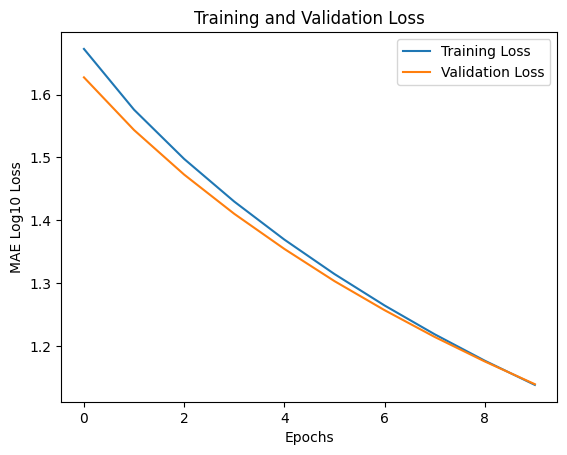

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Log10 Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
